In [1]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.insert(0, '../Modules/')

import pose_estimation as pe

In [2]:
directory = '../../../MEGA/Data/Kinect Zeno/Kinect processed'
file_name = '2014-12-22_P007_Pre_004'

load_path = os.path.join(directory, file_name)
df = pd.read_pickle(load_path)

In [3]:
part_types = ['HEAD', 'HIP', 'UPPER_LEG', 'KNEE', 'LOWER_LEG', 'FOOT']
lengths = [63.9626,   19.3718,   12.8402,   22.0421,   20.5768]
radii = [i for i in range(0, 30, 5)]

edges = np.matrix('0 1;  \
                   1 2;  \
                   2 3;  \
                   3 4;  \
                   4 5;  \
                   3 5;  \
                   1 3')


In [19]:
func = lambda x: pe.process_frame(x.to_dict(), part_types, edges, lengths, radii)
best_pos_series = df.apply(func, axis=1)

../Modules/pose_estimation.py:201: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_func  = lambda a, b: 1.0 / gen.norm_ratio(a, b)


In [50]:
# Each row i is a tuple containing the best positions for frame i
# Split each tuple into columns of a dataframe
df_best_pos = pd.DataFrame(best_pos_series.values.tolist(), columns=['Side A', 'Side B'])

In [53]:
df_best_pos.loc[624, 'Side A']

array([[ -45.0949 ,   66.0524 ,  238.755  ],
       [ -41.7954 ,    3.83081,  229.941  ],
       [ -43.2013 ,  -14.1134 ,  238.422  ],
       [ -51.6022 ,  -22.7422 ,  245.998  ],
       [ -62.4901 ,  -40.8276 ,  257.072  ],
       [ -74.5273 ,  -58.4675 ,  260.805  ]])

In [61]:
# Extract the head and feet positions
head_pos = df_best_pos['Side A'].apply(lambda row: row[0, :])
L_foot_pos = df_best_pos['Side A'].apply(lambda row: row[-1, :])
R_foot_pos = df_best_pos['Side B'].apply(lambda row: row[-1, :])

# Combine into new dataframe
df_head_feet = pd.concat([head_pos, L_foot_pos, R_foot_pos], axis=1) 
df_head_feet.columns = ['HEAD', 'L_FOOT', 'R_FOOT']
df_head_feet.index.name = 'Frame'

In [63]:
foot_dist = df_head_feet.apply(lambda row: np.linalg.norm(row['L_FOOT'] - row['R_FOOT']), axis=1)

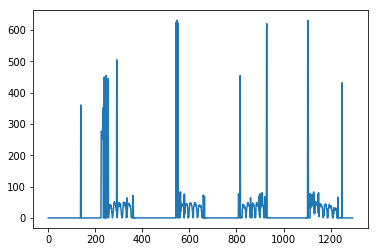

In [68]:
import matplotlib.pyplot as plt
plt.plot(foot_dist)
plt.show()